<a href="https://colab.research.google.com/github/naga-sk/DataScienceTraining-Assignments/blob/main/Statistics_Jul31_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem #1:
In a Sound and stereo store in Chicago the manager wants to know is there any relationship between the number of weekend television commercials shown and sales at the store at the following week.  The sample data of the store is provided in the spread sheet tab. Use that to solve the below problem

1.	Find the covariance between the variables and tell us is there any relationship between them
2.	Is the Sales and number of commercials correlated?  If yes - Positive/ Negative 


In [4]:
import pandas as pd

In [184]:
# Copy the provided data on to 2 separate series.
# Not really necessary to do it this way, but easier to copy / paste values from excel
com = pd.Series([2, 5, 1, 3, 4, 1, 5, 3, 4, 2])
sales_vol = pd.Series([50, 57, 41, 54, 54, 38, 63, 48, 59, 46])

In [185]:
# Create a dataframe and assign the series to the appropriate columns
df = pd.DataFrame(columns=["Commercials", "Sales_Vol"])
df["Commercials"] = com
df["Sales_Vol"] = sales_vol

In [186]:
# Check if the dataframe was created properly
df

,Commercials,Sales_Vol
0,2,50
1,5,57
2,1,41
3,3,54
4,4,54
5,1,38
6,5,63
7,3,48
8,4,59
9,2,46


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Commercials  10 non-null     int64
 1   Sales_Vol    10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


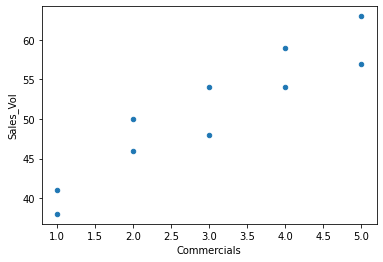

In [42]:
# Scatter plot reveals a clear positive covariance 
# where the sales volumes increase if the number of commercials increase

df.plot.scatter("Commercials", "Sales_Vol")

In [189]:
# Calculating the covariance also reveals a positive covariance 
# between commercials and sales value
# This calculates the covariance for full population 
# where the denominator is the total number of rows
df.cov().loc["Commercials","Sales_Vol"]

11.0

In [190]:
# This calculates the covariance for sample population 
# where the denominator is (total number of rows minus 1)
df.cov(ddof=0).loc["Commercials","Sales_Vol"]

9.9

#Problem #2:
In the above problem the Manager has been provided the data with the sales amount measured in Kilo $ (1000$). But now the sales team provides a new data in Tab 2 with the amount in $. Does this unit of measurement impact the covariance and correlation calculated in problem1. The data is in Tab2
*		Calculate the new covariance and correlation and confirm 




In [ ]:
import pandas as pd

In [192]:
# Copy the provided data to a 2 dimensional array and directly on to a dataframe

ndf = pd.DataFrame([[2, 50000], [5, 57000], [1, 41000], [3, 54000], [4, 54000], 
                    [1, 38000], [5, 63000], [3, 48000], [4, 59000], [2, 46000]], 
                   columns=["comm", "sales_vol"])

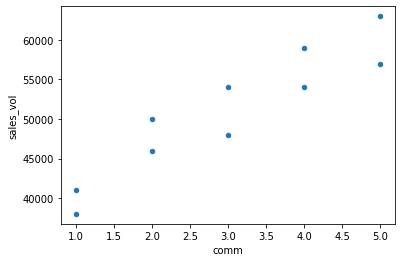

In [193]:
# Scatter plot reveals a clear positive covariance identical to that of #1
# where the sales volumes increase if the number of commercials increase
# Note that the y axis values display the 1000s. 
ndf.plot.scatter("comm", "sales_vol")

In [195]:
# The full population covariance is still positive, but has scaled to match 
# the adjusted sales volume (by a factor of 1000)
ndf.cov().loc["comm","sales_vol"]

11000.0

In [196]:
# The sample population covariance is still positive, but has scaled to match 
# the adjusted sales volume (by a factor of 1000)
ndf.cov(ddof=0).loc["comm","sales_vol"]

9900.0

#Problem #3:
The sales report about the pharmaceutical company  in million $ for the 21 states in US has been provided in the spread sheet

1.	Provide the five number summary of the box plot
2.	Compute the lower and upper limits
3.	Does the data contain any outlier ? 
4.	Ohio state has the highest sales at `$14,138` million. Suppose a data entry error has been made as `$41,138` million would this been identified as an outlier and corrected
5.	Out of 21 states provided what percentile states are above the Washington 
6.	What is the 85th percentile ?


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [197]:
# Copy the provided data on to 2 separate Numpy arrays.
# Not really necessary to do it this way, but easier to copy / paste values from excel

state = np.array(["Arizona", "California", "Colorado", "Florida", "Georgia",
            "Kansas", "Kentucky", "Ohio", "Maryland", "Massachusetts",
            "Michigan", "Mississippi", "Missouri", "New Jersey",
            "Louisiana", "Oklahoma", "Tennessee", "Texas", "Virginia",
            "Washington", "West Virginia"])
sales = np.array([8408, 1374, 1872, 8879, 2459, 11413, 608, 14138, 6452, 1850, 
                  2818, 1356, 10498, 7478, 4019, 4341, 739, 2127, 3653, 5794, 8305])
sdf = pd.DataFrame(columns=["State", "Sales"])
sdf["State"] = state
sdf["Sales"] = sales
sdf

,State,Sales
0,Arizona,8408
1,California,1374
2,Colorado,1872
3,Florida,8879
4,Georgia,2459
5,Kansas,11413
6,Kentucky,608
7,Ohio,14138
8,Maryland,6452
9,Massachusetts,1850


In [68]:
# 1.	Provide the five number summary of the box plot
# <describe()> function provides the summary (min, Q1, median(Q2), Q3 and max)
sdf.Sales.describe()

count       21.000000
mean      5170.523810
std       3917.732707
min        608.000000
25%       1872.000000
50%       4019.000000
75%       8305.000000
max      14138.000000
Name: Sales, dtype: float64

In [127]:
# 1.	Provide the five number summary of the box plot, 
# using pandas dataframe methods to calculate each value
min_sales = sdf.Sales.min()
q1 = sdf.Sales.quantile(0.25)
q2 = sdf.Sales.quantile(0.5)
q3 = sdf.Sales.quantile(0.75)
max_sales = sdf.Sales.max()

print(f"{min_sales}\t - Minimum")
print(f"{q1}\t - 1st Quadrile / 25th percentile")
print(f"{q2}\t - 2nd Quadrile / 50th percentile")
print(f"{sdf.Sales.median()}\t - Median")
print(f"{q3}\t - 3rd Quadrile / 75th percentile")
print(f"{max_sales}\t - Maximum")

608	 - Minimum
1872.0	 - 1st Quadrile / 25th percentile
4019.0	 - 2nd Quadrile / 50th percentile
4019.0	 - Median
8305.0	 - 3rd Quadrile / 75th percentile
14138	 - Maximum


In [130]:
# 2.	Compute the lower and upper limits

iqr = q3-q1
print(f"{iqr}\t - IQR\n")

lower_limit = round(q1-1.5*iqr,2)
upper_limit = round(q3+1.5*iqr,2)

print(f"{lower_limit}\t - Calculated Lower Limit")
if (lower_limit < min_sales):
  print(f"{min_sales}\t - Adjusted Lower Limit\n")
print(f"{upper_limit}\t - Calculated Upper Limit")
if (upper_limit > max_sales):
  print(f"{max_sales}\t - Adjusted Lower Limit\n")

6433.0	 - IQR

-7777.5	 - Calculated Lower Limit
608	 - Adjusted Lower Limit

17954.5	 - Calculated Upper Limit
14138	 - Adjusted Lower Limit



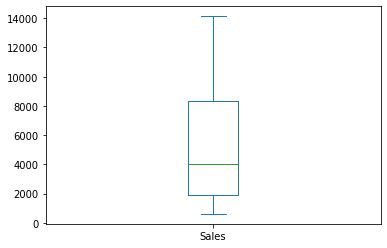

In [70]:
# Display the box plot
sdf.plot.box()

In [131]:
# 3.	Does the data contain any outlier ? 
# Calculate and print the outliers

filter1 = sdf.Sales > upper_limit
filter2 = sdf.Sales < lower_limit

outliers = sdf[filter1 | filter2]
outliers
# There are no outliers

,State,Sales


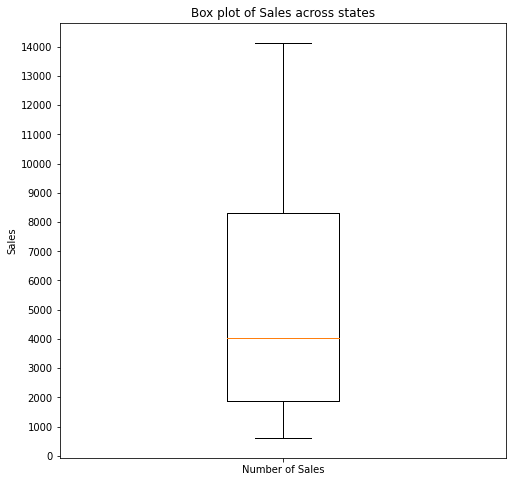

In [137]:
# Box plot using matplotlib boxplot library
# Also note that this does not use the dataframe.
# Instead, it uses the sales numpy array directly
fig = plt.figure(figsize=(8,8))
plt.boxplot(sales, widths=0.25, labels=["Number of Sales"])
plt.yticks(np.arange(0,max_sales,step=1000))
plt.ylabel('Sales')
plt.title('Box plot of Sales across states')
plt.show()

In [182]:
# 4.	Ohio state has the highest sales at $14,138 million. 
# Suppose a data entry error has been made as $ 41,138 million would this been 
# identified as an outlier and corrected?

sdf.loc[sdf.State == "Ohio","Sales"] = 41138
sdf

,State,Sales
0,Arizona,8408
1,California,1374
2,Colorado,1872
3,Florida,8879
4,Georgia,2459
5,Kansas,11413
6,Kentucky,608
7,Ohio,41138
8,Maryland,6452
9,Massachusetts,1850


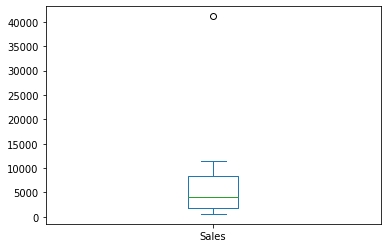

In [178]:
# The box plot shows an outlier beyond the upper limit
sdf.plot.box()

In [180]:
# Calculate revised values for min, max, median, and quartiles
min_sales = sdf.Sales.min()
q1 = sdf.Sales.quantile(0.25)
q2 = sdf.Sales.quantile(0.5)
q3 = sdf.Sales.quantile(0.75)
max_sales = sdf.Sales.max()

iqr = q3-q1
print(f"{iqr}\t - IQR\n")

lower_limit = round(q1-1.5*iqr,2)
upper_limit = round(q3+1.5*iqr,2)

print(f"{lower_limit}\t - Calculated Lower Limit")
if (lower_limit < min_sales):
  print(f"{min_sales}\t - Adjusted Lower Limit\n")
print(f"{upper_limit}\t - Calculated Upper Limit")
if (upper_limit > max_sales):
  print(f"{max_sales}\t - Adjusted Lower Limit\n")

6433.0	 - IQR

-7777.5	 - Calculated Lower Limit
608	 - Adjusted Lower Limit

17954.5	 - Calculated Upper Limit


In [181]:
# Calculate and print the outliers

filter1 = sdf.Sales > upper_limit
filter2 = sdf.Sales < lower_limit

outliers = sdf[filter1 | filter2]
outliers
# Yes, Ohio is now an outlier

,State,Sales
7,Ohio,41138


In [207]:
# 5.	Out of 21 states provided what percentile states are above the Washington

# Create a sorted ranked list of the Sales figures
sorted_sdf = sdf.sort_values("Sales")
sorted_sdf["pct_rank"] = sorted_sdf.Sales.rank(pct=True)
sorted_sdf

,State,Sales,pct_rank
6,Kentucky,608,0.047619
16,Tennessee,739,0.095238
11,Mississippi,1356,0.142857
1,California,1374,0.190476
9,Massachusetts,1850,0.238095
2,Colorado,1872,0.285714
17,Texas,2127,0.333333
4,Georgia,2459,0.380952
10,Michigan,2818,0.428571
18,Virginia,3653,0.476190


In [246]:
# Find and print the percentile of Washington
query_state = "Washington"
pct_rank_of_queried_state = sorted_sdf.loc[sorted_sdf["State"]==query_state,"pct_rank"]
print(f"{query_state} percentile rank is {round(pct_rank_of_queried_state.values[0]*100,1)}")

# Calculate and print the percentile of states above Washingon by subtracting from 100
delta_pct_rank = round((1 - pct_rank_of_queried_state.values[0])*100,1)
print(f"{delta_pct_rank} percentile of states have more sales than {query_state}")

# Get the table of all states and sales figures above that of Washington
sorted_sdf.loc[sorted_sdf["pct_rank"] > pct_rank_of_queried_state.values[0]]

Washington percentile rank is 61.9
38.1 percentile of states have more sales than Washington


,State,Sales,pct_rank
8,Maryland,6452,0.666667
13,New Jersey,7478,0.714286
20,West Virginia,8305,0.761905
0,Arizona,8408,0.809524
3,Florida,8879,0.857143
12,Missouri,10498,0.904762
5,Kansas,11413,0.952381
7,Ohio,14138,1.000000


In [250]:
# 6.	What is the 85th percentile ?
sdf.Sales.quantile(0.85)

8879.0

#Problem #4.	
In an IPL auction a team wants to buy a foreign player who is an all-rounder to balance their side. The team has the budget to spend on only one player and they are looking for a player who could help them in their batting department. The franchise now has the data with the runs scored by player A and player B in their last 20 matches and are confused on their selection
*	Can you help them with your analysis? You know what needs to be done 


In [265]:
import numpy as np
import statistics as stat
# Copy the data of both players into their own numpy arrays
player_a = np.array([25, 40, 38, 48, 51, 35, 100, 25, 15, 20, 21, 25, 35, 40, 7, 12, 25, 40, 42, 56])
player_b = np.array([0, 25, 22, 38, 25, 45, 51, 60, 62, 93, 68, 63, 42, 9, 3, 5, 20, 14, 18, 37])

# Tabulate and print statistical values
print("Stat \tPlayer A \tPlayer B")
print(f"Mean \t{player_a.mean()}\t\t{player_b.mean()}")
print(f"Median \t{np.median(player_a)}\t\t{np.median(player_b)}")
print(f"Mode \t{stat.mode(player_a)}\t\t{stat.mode(player_b)}")
print(f"Max \t{player_a.max()}\t\t{player_b.max()}")
print(f"Min \t{player_a.min()}\t\t{player_b.min()}")
print(f"Range \t{player_a.max()-player_a.min()}\t\t{player_b.max()-player_b.min()}")
print(f"StDev \t{round(player_a.std(),1)}\t\t{round(player_b.std(),1)}")

# Based on the below stats, player A should be selected because
# 1. Higher median
# 2. Higher min and max scores
# 3. Lower standard deviation / variance

Stat 	Player A 	Player B
Mean 	35.0		35.0
Median 	35.0		31.0
Mode 	25		25
Max 	100		93
Min 	7		0
Range 	93		93
StDev 	19.7		24.7


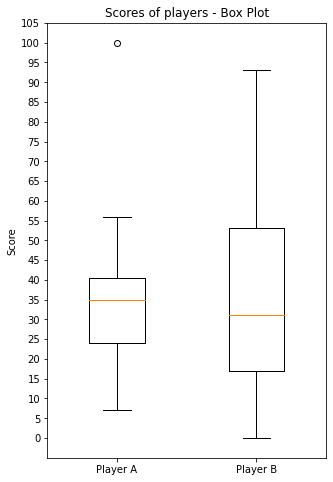

In [273]:
# Now let us compare both players' scores using a box plot

fig = plt.figure(figsize=(5,8))
plt.boxplot([player_a, player_b], widths=0.4, labels=["Player A", "Player B"])
plt.yticks(np.arange(0,110,step=5))
plt.ylabel('Score')
plt.title('Scores of players - Box Plot')
plt.show()

# Box plot reveals a different story, 
# That player A's IQR is considerably smaller and skewed by a single outlier
# That player B's IQR is > 2X larger compared to player A and showing 
# consistency of performance
# Based on this, Player B should be recommended

# Problem #5
With the same data as above - Consider the data provide for the 20 matches as a population data, pick random samples from the population with sample size (n) as 7 and let the number of samples be 10. Compute mean of individual samples and consider this a new data in a table. Now compute the Mean and standard deviation of this tabular data
1.	Do you find any difference between the population mean and the mean of sample means. 
2.	Is the population standard deviation higher or lower than the new standard deviation you calculated


In [309]:
no_sample_draws = 10
sample_size = 7
player_a_means = np.zeros(no_sample_draws, dtype=int)

for index in range(no_sample_draws):
  index_arr = np.random.choice(len(player_a), size=sample_size, replace=False)
  player_a_means[index] = player_a[index_arr].mean()

print(player_a_means)

# Tabulate and print statistical values
print(f"Stat \tPlayer A \tMeans of {no_sample_draws} draws of {sample_size} random samples of Player A scores")
print(f"Mean \t{player_a.mean()}\t\t{player_a_means.mean()}")
print(f"StDev \t{round(player_a.std(),1)}\t\t{round(player_a_means.std(),1)}")

[30 27 33 26 42 34 24 43 36 40]
Stat 	Player A 	Means of 10 draws of 7 random samples of Player A scores
Mean 	35.0		33.5
StDev 	19.7		6.4


In [308]:
no_sample_draws = 10
sample_size = 7
player_b_means = np.zeros(no_sample_draws, dtype=int)

for index in range(no_sample_draws):
  index_arr = np.random.choice(len(player_b), size=sample_size, replace=False)
  player_b_means[index] = player_b[index_arr].mean()

print(player_b_means)

# Tabulate and print statistical values
print(f"Stat \tPlayer A \tMeans of {no_sample_draws} draws of {sample_size} random samples of Player B scores")
print(f"Mean \t{player_b.mean()}\t\t{player_b_means.mean()}")
print(f"StDev \t{round(player_b.std(),1)}\t\t{round(player_b_means.std(),1)}")

[48 45 31 39 31 24 29 28 42 38]
Stat 	Player A 	Means of 10 draws of 7 random samples of Player B scores
Mean 	35.0		35.5
StDev 	24.7		7.6
